The UKgas dataset is a built-in dataset in R that records quarterly UK gas consumption in millions of therms from 1960 to 1986.Use data("UKgas") to load the dataset. Answer the following questions.

Plot the original UKgas time series to visualize the data.

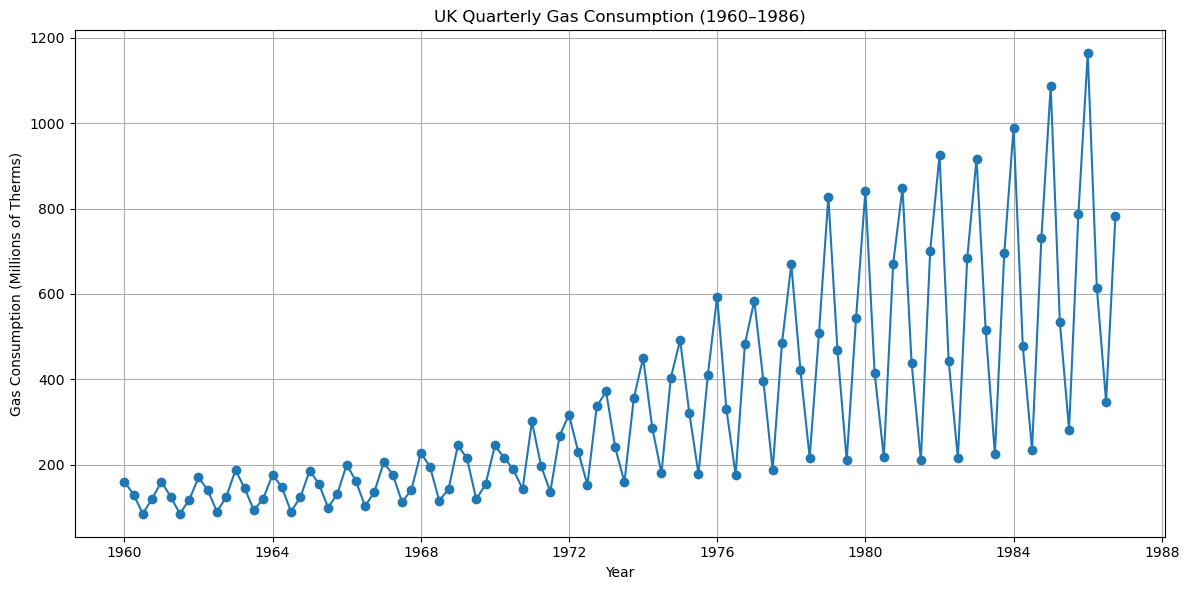

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = 'HW_M3_UKgas_S.xlsx'
excel_data = pd.read_excel(file_path)

def convert_quarter_to_date(quarter_str):
    year, q = quarter_str[:4], quarter_str[5]
    month = {'1': '01', '2': '04', '3': '07', '4': '10'}[q]
    return pd.to_datetime(f"{year}-{month}-01")

excel_data['Date'] = excel_data['Unnamed: 0'].apply(convert_quarter_to_date)
excel_data.set_index('Date', inplace=True)

plt.figure(figsize=(12, 6))
plt.plot(excel_data.index, excel_data['UKGAS'], marker='o')
plt.title('UK Quarterly Gas Consumption (1960–1986)')
plt.xlabel('Year')
plt.ylabel('Gas Consumption (Millions of Therms)')
plt.grid(True)
plt.tight_layout()
plt.show()

Apply the Simple Exponential Smoothing (SES) to the dataset and forecast gas consumption for the next 8 quarters. Plot the forecasted values along with the historical data. Interpret the results briefly.

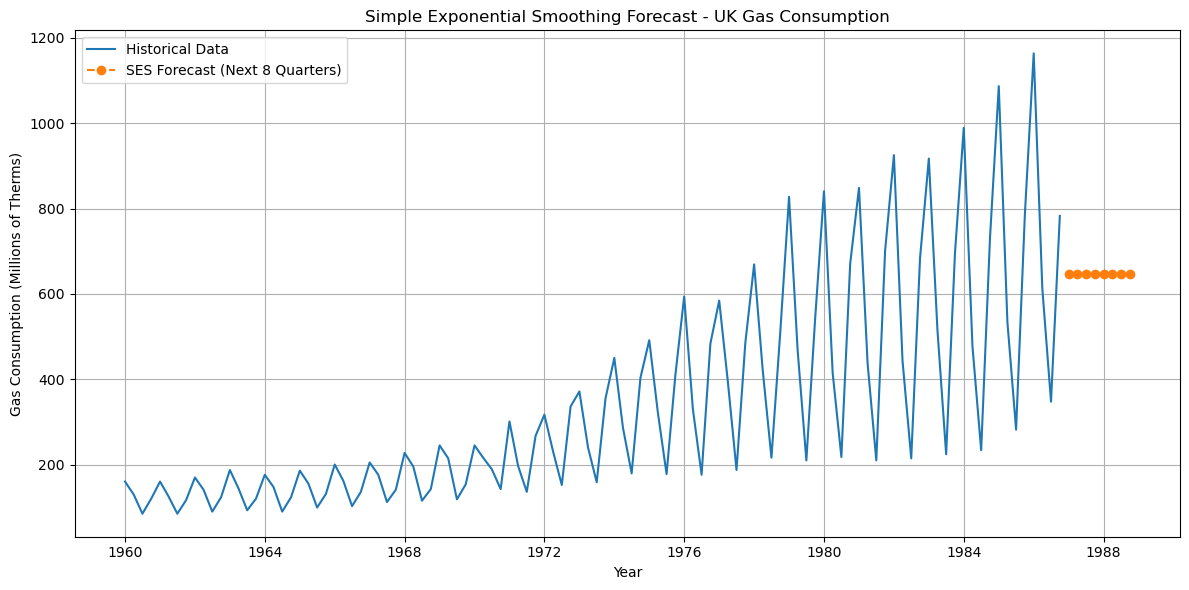

Forecast:
 1987-01-01    646.15844
1987-04-01    646.15844
1987-07-01    646.15844
1987-10-01    646.15844
1988-01-01    646.15844
1988-04-01    646.15844
1988-07-01    646.15844
1988-10-01    646.15844
Freq: QS-OCT, dtype: float64

Smoothing Level (alpha): 0.1278639827650725


In [21]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

# Load the dataset
file_path = 'HW_M3_UKgas_S.xlsx'
excel_data = pd.read_excel(file_path)

# Convert '1960Q1' to PeriodIndex and then to Timestamp for plotting
excel_data['Date'] = pd.PeriodIndex(excel_data['Unnamed: 0'], freq='Q')
excel_data.set_index('Date', inplace=True)
excel_data.index = excel_data.index.to_timestamp()  # Convert to datetime index

# Extract the time series
ts_data = excel_data['UKGAS']

# Fit the SES model
ses_model = SimpleExpSmoothing(ts_data).fit(optimized=True)

# Forecast the next 8 quarters
forecast_steps = 8
ses_forecast = ses_model.forecast(forecast_steps)

# Plot historical data and forecast
plt.figure(figsize=(12, 6))
plt.plot(ts_data, label='Historical Data')
plt.plot(ses_forecast, label='SES Forecast (Next 8 Quarters)', marker='o', linestyle='--')
plt.title('Simple Exponential Smoothing Forecast - UK Gas Consumption')
plt.xlabel('Year')
plt.ylabel('Gas Consumption (Millions of Therms)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Print forecast values and smoothing level
print("Forecast:\n", ses_forecast)
print("\nSmoothing Level (alpha):", ses_model.params['smoothing_level'])

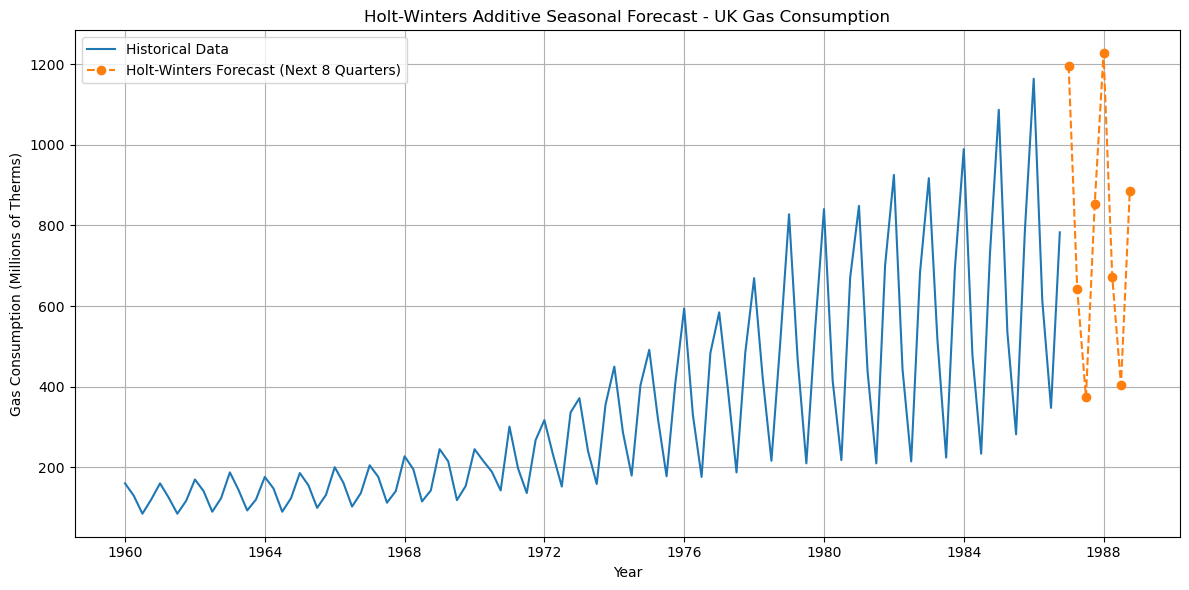

Forecast (Next 8 Quarters):
1987-01-01    1196.721185
1987-04-01     642.181318
1987-07-01     373.891661
1987-10-01     854.107882
1988-01-01    1226.942910
1988-04-01     672.403042
1988-07-01     404.113386
1988-10-01     884.329607
Freq: QS-OCT, dtype: float64


In [23]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Load the Excel file
file_path = 'HW_M3_UKgas_S.xlsx'
excel_data = pd.read_excel(file_path)

# Convert '1960Q1' to PeriodIndex and then to Timestamp for plotting
excel_data['Date'] = pd.PeriodIndex(excel_data['Unnamed: 0'], freq='Q')
excel_data.set_index('Date', inplace=True)
excel_data.index = excel_data.index.to_timestamp()

# Extract the time series
ts_data = excel_data['UKGAS']

# Fit Holt-Winters model with additive trend and additive seasonality
hw_model = ExponentialSmoothing(ts_data, trend='add', seasonal='add', seasonal_periods=4).fit()

# Forecast the next 8 quarters
hw_forecast = hw_model.forecast(8)

# Plot the historical data and forecast
plt.figure(figsize=(12, 6))
plt.plot(ts_data, label='Historical Data')
plt.plot(hw_forecast, label='Holt-Winters Forecast (Next 8 Quarters)', marker='o', linestyle='--')
plt.title('Holt-Winters Additive Seasonal Forecast - UK Gas Consumption')
plt.xlabel('Year')
plt.ylabel('Gas Consumption (Millions of Therms)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Print the forecast values
print("Forecast (Next 8 Quarters):")
print(hw_forecast)


The forecast shows strong seasonal effects: gas usage is highest in Q1 (winter) and lowest in Q3 (summer).
There's also a clear upward trend, meaning overall gas consumption is expected to increase over time.
This behavior is well captured by the additive Holt-Winters model, which accounts for both trend and seasonality.

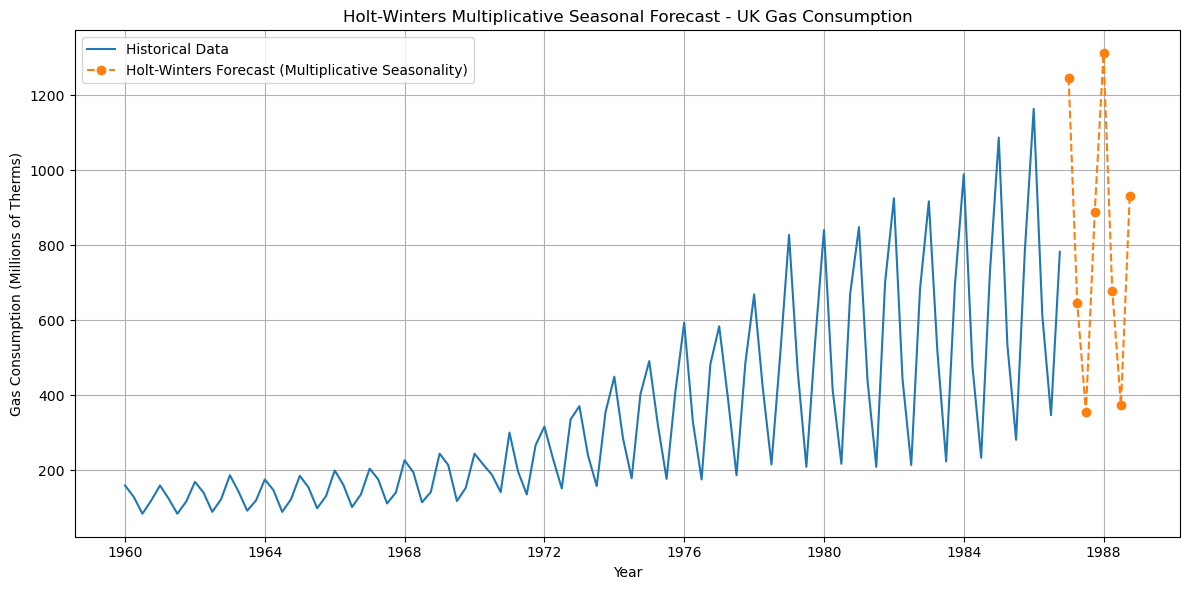

Forecast (Next 8 Quarters):
1987-01-01    1247.078320
1987-04-01     646.145995
1987-07-01     355.979164
1987-10-01     888.515250
1988-01-01    1311.609937
1988-04-01     679.154604
1988-07-01     373.935170
1988-10-01     932.774873
Freq: QS-OCT, dtype: float64


In [26]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Load the Excel file
file_path = 'HW_M3_UKgas_S.xlsx'
excel_data = pd.read_excel(file_path)

# Convert '1960Q1' to PeriodIndex and then to Timestamp for plotting
excel_data['Date'] = pd.PeriodIndex(excel_data['Unnamed: 0'], freq='Q')
excel_data.set_index('Date', inplace=True)
excel_data.index = excel_data.index.to_timestamp()

# Extract the time series
ts_data = excel_data['UKGAS']

# Fit Holt-Winters model with additive trend and multiplicative seasonality
hw_multiplicative_model = ExponentialSmoothing(
    ts_data,
    trend='add',
    seasonal='mul',
    seasonal_periods=4
).fit()

# Forecast the next 8 quarters
hw_multiplicative_forecast = hw_multiplicative_model.forecast(8)

# Plot the historical data and forecast
plt.figure(figsize=(12, 6))
plt.plot(ts_data, label='Historical Data')
plt.plot(hw_multiplicative_forecast, label='Holt-Winters Forecast (Multiplicative Seasonality)', marker='o', linestyle='--')
plt.title('Holt-Winters Multiplicative Seasonal Forecast - UK Gas Consumption')
plt.xlabel('Year')
plt.ylabel('Gas Consumption (Millions of Therms)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Print the forecast values
print("Forecast (Next 8 Quarters):")
print(hw_multiplicative_forecast)


Additive Holt-Winters:
MAE = 65.76, RMSE = 74.36

Multiplicative Holt-Winters:
MAE = 60.49, RMSE = 70.22


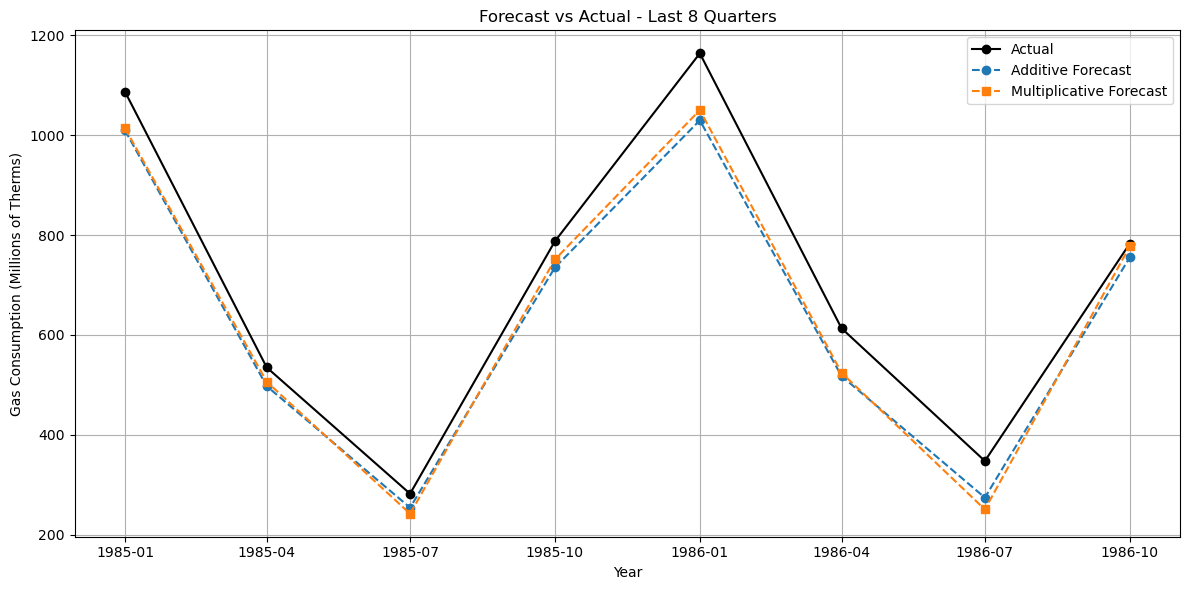

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_absolute_error, root_mean_squared_error

# Load the dataset
file_path = 'HW_M3_UKgas_S.xlsx'
excel_data = pd.read_excel(file_path)

# Prepare time series
excel_data['Date'] = pd.PeriodIndex(excel_data['Unnamed: 0'], freq='Q')
excel_data.set_index('Date', inplace=True)
excel_data.index = excel_data.index.to_timestamp()
ts_data = excel_data['UKGAS']

# Split into training and test (last 8 quarters)
train_data = ts_data[:-8]
test_data = ts_data[-8:]

# Fit additive Holt-Winters model
hw_add = ExponentialSmoothing(train_data, trend='add', seasonal='add', seasonal_periods=4).fit()
add_forecast = hw_add.forecast(8)

# Fit multiplicative Holt-Winters model
hw_mul = ExponentialSmoothing(train_data, trend='add', seasonal='mul', seasonal_periods=4).fit()
mul_forecast = hw_mul.forecast(8)

# Compute MAE and RMSE using updated method
def compute_metrics(true, predicted):
    mae = mean_absolute_error(true, predicted)
    rmse = root_mean_squared_error(true, predicted)
    return mae, rmse

add_mae, add_rmse = compute_metrics(test_data, add_forecast)
mul_mae, mul_rmse = compute_metrics(test_data, mul_forecast)

# Print accuracy
print("Additive Holt-Winters:")
print(f"MAE = {add_mae:.2f}, RMSE = {add_rmse:.2f}")

print("\nMultiplicative Holt-Winters:")
print(f"MAE = {mul_mae:.2f}, RMSE = {mul_rmse:.2f}")

# Plot actual vs forecasts
plt.figure(figsize=(12, 6))
plt.plot(test_data.index, test_data.values, label='Actual', color='black', marker='o')
plt.plot(add_forecast.index, add_forecast.values, label='Additive Forecast', marker='o', linestyle='--')
plt.plot(mul_forecast.index, mul_forecast.values, label='Multiplicative Forecast', marker='s', linestyle='--')
plt.title('Forecast vs Actual - Last 8 Quarters')
plt.xlabel('Year')
plt.ylabel('Gas Consumption (Millions of Therms)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
